In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50, InceptionV3, DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score

In [6]:
# Define directories
data_dir = "/kaggle/input/open-data-day-2025-dates-types-classification/train"
test_dir = "/kaggle/input/open-data-day-2025-dates-types-classification/test"
labels_file = "/kaggle/input/open-data-day-2025-dates-types-classification/train_labels.csv"
submission_file = "/kaggle/input/open-data-day-2025-dates-types-classification/sample_submission.csv"

In [7]:
# Load labels
df_labels = pd.read_csv(labels_file)
df_labels["label"] = df_labels["label"].astype(str)

In [8]:
# Get unique classes
classes = df_labels["label"].unique()
num_classes = len(classes)
class_mapping = {label: i for i, label in enumerate(classes)}

In [9]:
# Preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    return image

In [10]:
# Load images and labels
x_data = []
y_data = []

for idx, row in df_labels.iterrows():
    image_path = os.path.join(data_dir, row["filename"])
    if os.path.exists(image_path):
        x_data.append(preprocess_image(image_path))
        y_data.append(class_mapping[row["label"]])

In [11]:
# Convert to NumPy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)

In [12]:
x_data


array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [13]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,

In [14]:
# Split data
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

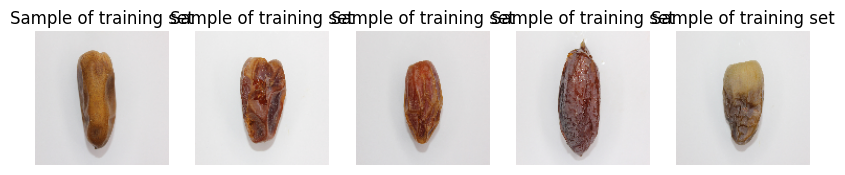

In [15]:
# Display sample images
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title("Sample of training set")
    plt.axis("off")
plt.show()

In [16]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

In [17]:
# Load dataset (Assuming x_data, y_data are already preprocessed)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Image augmentation for better generalization
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(x_train)

In [18]:
# Function to build models
def build_model(base_model):
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# Define models
resnet_model = build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))
inception_model = build_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))
densenet_model = build_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 526,343 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,329,127 (85.18 MB)

 Trainable params: 526,343 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,301,703 (27.85 MB)

 Trainable params: 264,199 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [19]:
# Train and evaluate models
def train_and_evaluate(model, name):
    print(f"Training {name}...")
    history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=100, validation_data=(x_val, y_val))
    val_loss, val_acc = model.evaluate(x_val, y_val)
    print(f"{name} Validation Accuracy: {val_acc:.4f}")
    return history

# Train models
hist_resnet = train_and_evaluate(resnet_model, "ResNet-50")
hist_inception = train_and_evaluate(inception_model, "InceptionV3")
hist_densenet = train_and_evaluate(densenet_model, "DenseNet")


Training ResNet-50...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 923ms/step - accuracy: 0.1207 - loss: 2.4016 - val_accuracy: 0.1379 - val_loss: 2.0425
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1264 - loss: 2.2258 - val_accuracy: 0.1379 - val_loss: 1.9767
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1886 - loss: 2.1541 - val_accuracy: 0.1379 - val_loss: 1.9431
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1149 - loss: 2.1508 - val_accuracy: 0.1954 - val_loss: 1.9292
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1562 - loss: 2.0445 - val_accuracy: 0.1954 - val_loss: 1.9236
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1327 - loss: 2.0966 - val_accuracy: 0.1954 - val_loss: 1.9218
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1630 - loss: 2.0636 - val_accuracy: 0.1954 - val_loss: 1.9215
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1108 - loss: 2.0648 - val_accuracy: 0.1954 - val

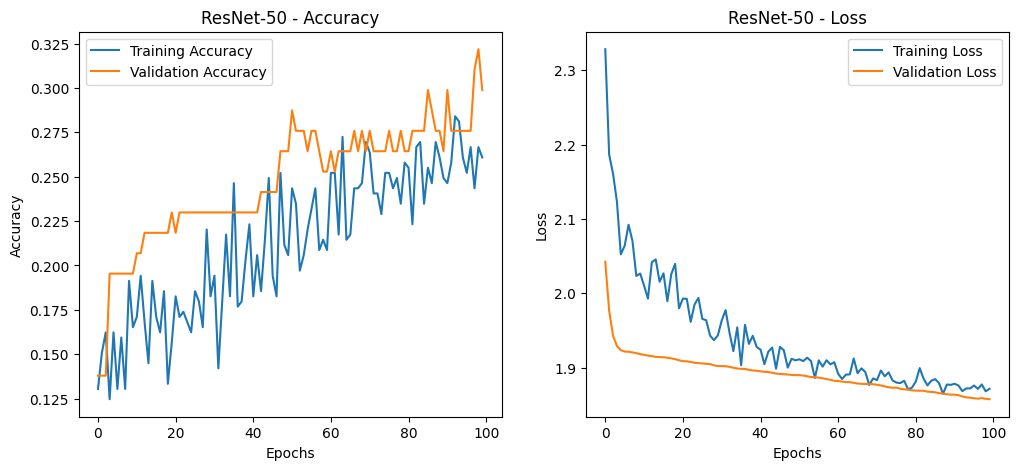

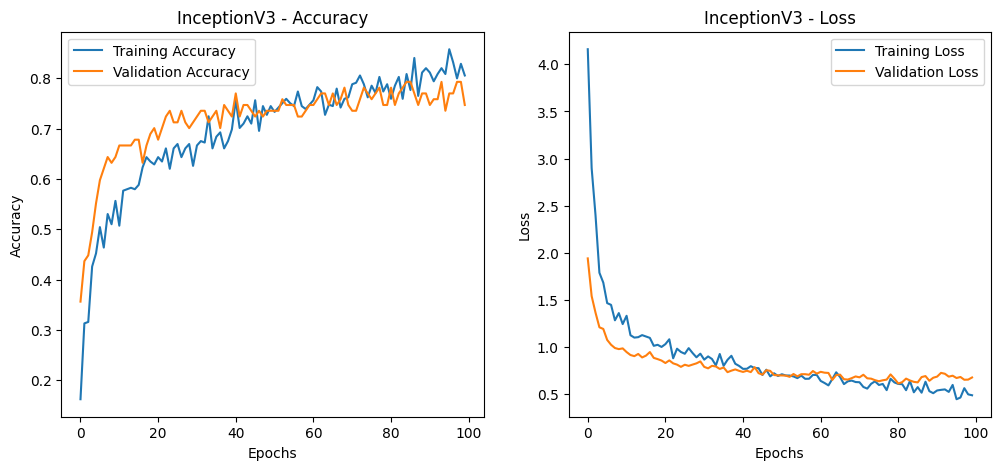

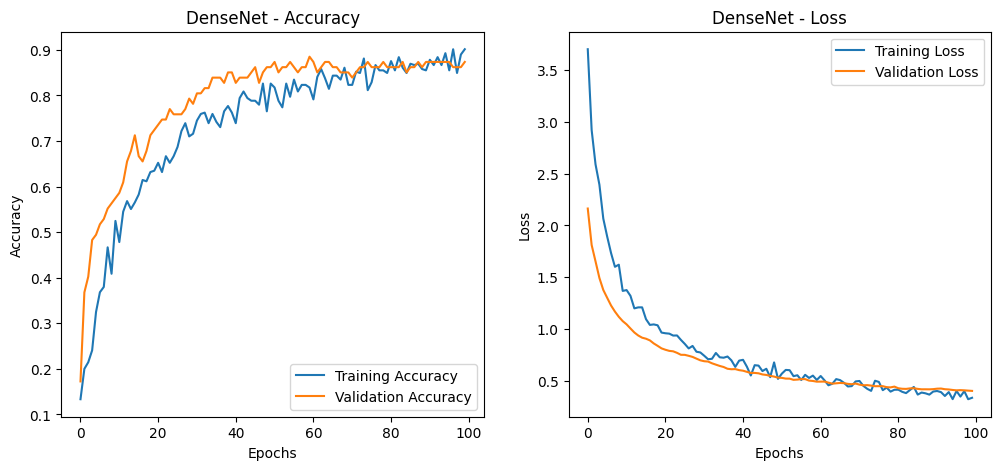

In [20]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function for each model after training
plot_training_history(hist_resnet, "ResNet-50")
plot_training_history(hist_inception, "InceptionV3")
plot_training_history(hist_densenet, "DenseNet")


In [21]:
# Train best model 
history = densenet_model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_val, y_val), epochs=10)

# Evaluate on validation data
y_pred = np.argmax(resnet_model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8966 - loss: 0.3244 - val_accuracy: 0.8621 - val_loss: 0.4075
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9166 - loss: 0.2851 - val_accuracy: 0.8621 - val_loss: 0.4189
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8655 - loss: 0.4029 - val_accuracy: 0.8621 - val_loss: 0.4069
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8773 - loss: 0.3330 - val_accuracy: 0.8736 - val_loss: 0.3994
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8900 - loss: 0.3647 - val_accuracy: 0.8736 - val_loss: 0.3976
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8954 - loss: 0.3364 - val_accuracy: 0.8621 - val_loss: 0.3990
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8842 - loss: 0.3270 - val_accuracy: 0.8621 - val_loss: 0.3979
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9149 - loss: 0.2855 - val_accuracy: 0.8506 - v

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8856 - loss: 0.3047 - val_accuracy: 0.8736 - val_loss: 0.4006
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8733 - loss: 0.3202 - val_accuracy: 0.8736 - val_loss: 0.3941
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9101 - loss: 0.2833 - val_accuracy: 0.8736 - val_loss: 0.3982
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9344 - loss: 0.2828 - val_accuracy: 0.8621 - val_loss: 0.3935
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9197 - loss: 0.2892 - val_accuracy: 0.8851 - val_loss: 0.3789
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9272 - loss: 0.2755 - val_accuracy: 0.8736 - val_loss: 0.3834
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9151 - loss: 0.3128 - val_accuracy: 0.8621 - val_loss: 0.3862
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9225 - loss: 0.2561 - val_accuracy: 0.8621 - val_loss: 0.

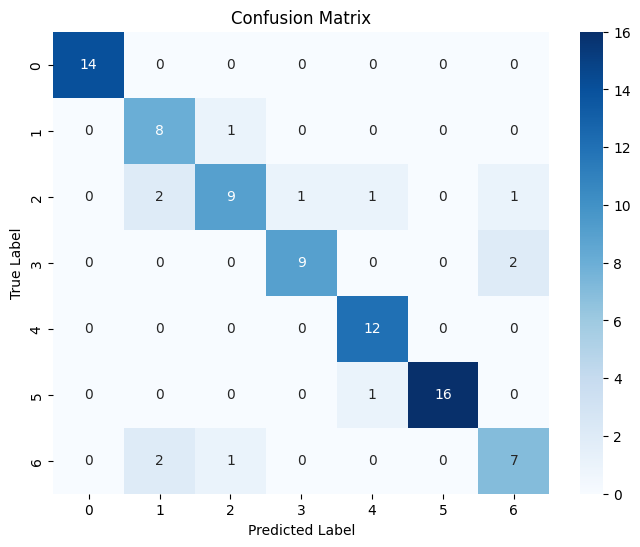

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train best model
history = densenet_model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_val, y_val), epochs=10)

# Evaluate on validation data using DenseNet model
y_pred = np.argmax(densenet_model.predict(x_val), axis=1)  # Get predicted labels
y_true = np.argmax(y_val, axis=1)  # Get true labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Load test images
def load_test_images(test_dir):
    test_images = []
    filenames = []
    for file in os.listdir(test_dir):
        image_path = os.path.join(test_dir, file)
        if os.path.isfile(image_path):
            test_images.append(preprocess_image(image_path))
            filenames.append(file)
    return np.array(test_images), filenames

test_images, filenames = load_test_images(test_dir)

In [33]:
# Predict on test images
test_preds = np.argmax(densenet_model.predict(test_images), axis=1)
test_labels = [classes[i] for i in test_preds]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


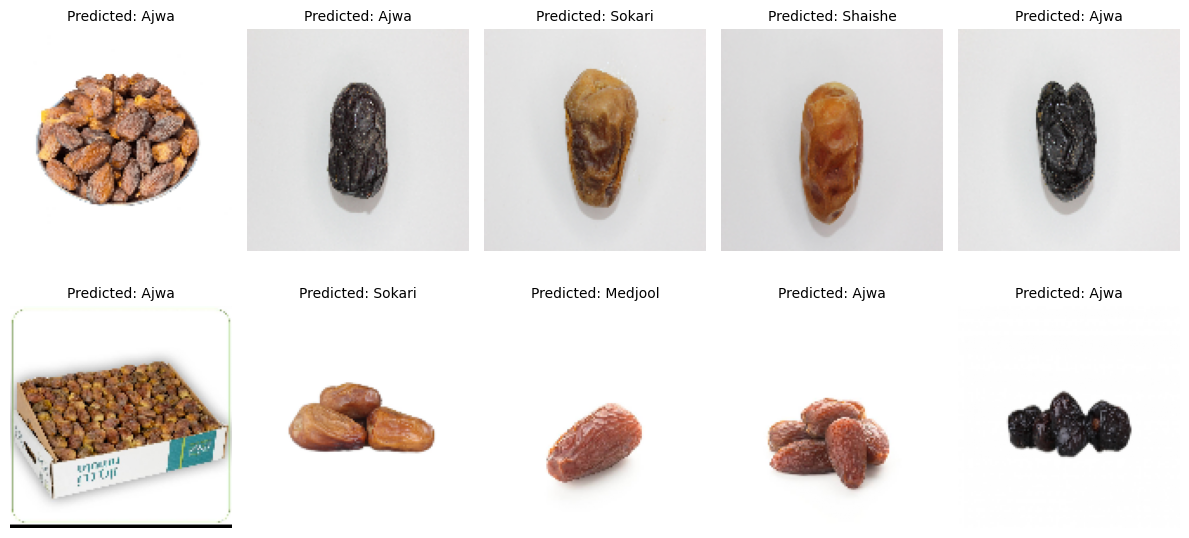

In [34]:
# Number of images to display
num_images = 10
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])  # Assuming test_images is preprocessed and normalized
    plt.axis("off")
    plt.title(f"Predicted: {test_labels[i]}", fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
# Create submission file
submission_df = pd.DataFrame({"filename": filenames, "label": test_labels})
submission_df.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")
submission_df

Submission file saved as submission.csv


,filename,label
0,0b59e0e8.jpg,Ajwa
1,26682f66.jpg,Ajwa
2,a5776799.jpg,Sokari
3,92f470d1.jpg,Shaishe
4,0bd19b28.jpg,Ajwa
...,...,...
121,383cfe33.jpg,Nabtat Ali
122,9789fc6b.png,Ajwa
123,8c957e8e.jpg,Sugaey
124,3f9b55cd.png,Ajwa
